In [48]:
## Joshua Project, Frontier Peoples, csv from https://joshuaproject.net/frontier/1
import numpy as np
import pandas as pd
df = pd.read_csv("data/frontier_peoples.csv")
df.head().append(df.tail())

,ID,People,Country,Language,Religion,Indigenous,10/40 Window,PeopleID3,Rog3,Frontier,PopulationRange,% Adherents Source,% Christian Adherents,Population,Workers Needed
0,10120MY,Abai Sungai,Malaysia,Abai Sungai,Islam,Yes,Yes,10120,MY,Y,1,0.00%,0.00%,1500.0,1.0
1,10125EG,"Abaza, Arabized",Egypt,"Arabic, Egyptian Spoken",Islam,Yes,Yes,10125,EG,Y,1,10.00%,0.10%,15000.0,1.0
2,10125RS,Abaza,Russia,Abaza,Islam,Yes,No,10125,RS,Y,1,10.00%,0.10%,45000.0,1.0
3,10130TU,Abkhaz,Turkey,Abkhaz,Islam,Yes,Yes,10130,TU,Y,2,0.00%,0.00%,166000.0,3.0
4,10136CD,Abu Sharib,Chad,Mararit,Islam,Yes,Yes,10136,CD,Y,1,1.00%,0.01%,85000.0,2.0
4983,17571PK,Jat (Muslim traditions),Pakistan,"Punjabi, Western",Islam,Yes,Yes,17571,PK,Y,5,0.00%,0.00%,28827000.0,577.0
4984,18084IN,Shaikh,India,Urdu,Islam,Yes,Yes,18084,IN,Y,5,0.00%,0.00%,85886000.0,1718.0
4985,18084BG,Shaikh,Bangladesh,Bengali,Islam,Yes,Yes,18084,BG,Y,5,0.00%,0.00%,125776000.0,2516.0
4986,15755CH,Uyghur,China,Uyghur,Islam,Yes,Yes,15755,CH,Y,5,0.80%,0.01%,11921000.0,238.0
4987,18274TU,Turk,Turkey,Turkish,Islam,Yes,Yes,18274,TU,Y,5,1.00%,0.01%,59753000.0,1195.0


<AxesSubplot:xlabel='Population'>

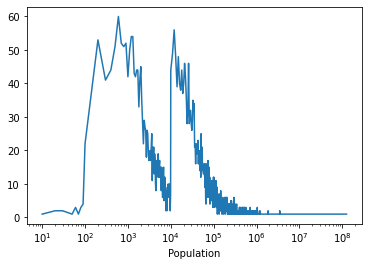

In [49]:
## number of frontier people groups by population size showing most of them are in between 10^2 to 10^5 (100 to 90,000) a size of a village, town or city
people_by_population = df.groupby("Population")["ID"].count()
people_by_population.plot(y="People Group Count", x="Population", logx=True)

In [50]:
## total number of frontier people groups
pop = df["Population"]
pop.count()

4985

In [51]:
## number of frontier people groups grouped by population in a table

def logs(n):
    return pow(10, n)

def label(n):
    return f'10^{n}'

bins = list(map(logs, np.arange(2, 8)))
bins.insert(0, pop.min())
bins.append(pop.max())
labels = list(map(label, np.arange(2, 9)))
summary = pd.cut(pop, bins, labels=labels).value_counts().sort_index()
summary

10^2      38
10^3     446
10^4    1536
10^5    1760
10^6     935
10^7     236
10^8      33
Name: Population, dtype: int64

<AxesSubplot:>

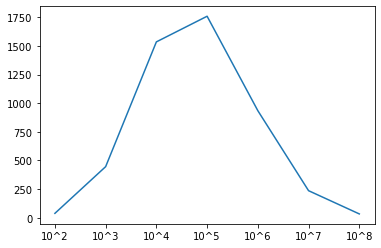

In [52]:
## number of frontier people groups grouped by population in a graph

summary.plot()

In [53]:
# number of frontier people group split by population below and above 10^6

pd.cut(pop, bins=[pop.min(), pow(10, 6), pop.max()]).value_counts().sort_index()

(10.0, 1000000.0]           4715
(1000000.0, 125776000.0]     269
Name: Population, dtype: int64

In [54]:
# number of frontier people group split by population below and above 10^7

pd.cut(pop, bins=[pop.min(), pow(10, 7), pop.max()]).value_counts().sort_index()

(10.0, 10000000.0]           4951
(10000000.0, 125776000.0]      33
Name: Population, dtype: int64